In [37]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("D:/irisfinal.txt",delimiter=',',header=None)
data = data.drop([1,2],axis=1)
data = data.replace('Iris-setosa',0)
data = data.replace('Iris-versicolor',1)
data = data.replace('Iris-virginica',2)
data = np.asarray(data)
np.random.shuffle(data)
train = data[0:int(len(data)*0.7)]
test = data[int(len(data)*0.7):]
trainX = [row[0:2] for row in train]
trainY = [row[-1] for row in train]
testX = [row[0:2] for row in test]
testY = [row[-1] for row in test]
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

In [4]:
x = data[:,0]
y = data[:,1]
labels = data[:,-1]
features = data[:,:2]

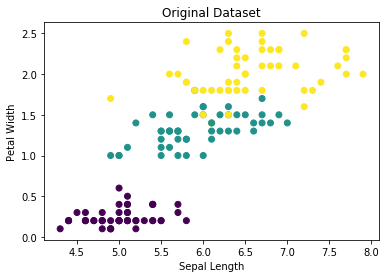

In [5]:
plt.scatter(x,y,c=labels)
plt.title('Original Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

### KMeans

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0, init='random')

In [42]:
start_time = time.time()
kmeans.fit(features,labels)
kmeans_time = time.time() - start_time

In [8]:
kmeans_predlabels = kmeans.predict(features)
kmeans_centers = kmeans.cluster_centers_

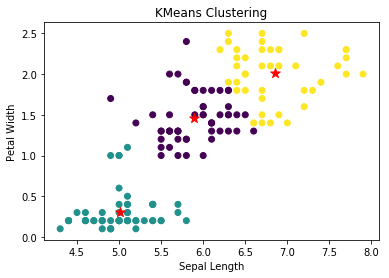

In [9]:
plt.scatter(x,y,c=kmeans_predlabels)
plt.scatter(kmeans_centers[:,0],kmeans_centers[:,1],marker='*',s=100,c='red')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [10]:
kmeans_cost_fn = kmeans.inertia_

In [18]:
print('KMeans Cost :',kmeans_cost_fn)

KMeans Cost : 32.76801587301588


### KMeans++

In [12]:
kmeansplusplus = KMeans(n_clusters=3, random_state=0, init='k-means++')

In [43]:
start_time = time.time()
kmeansplusplus.fit(features,labels)
kmeansplusplus_time = time.time() - start_time

In [14]:
kmeansplusplus_predlabels = kmeansplusplus.predict(features)
kmeansplusplus_centers = kmeansplusplus.cluster_centers_

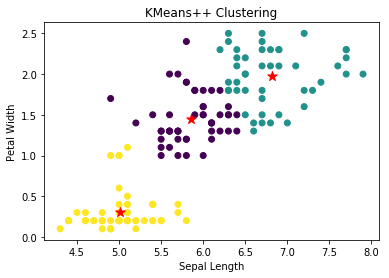

In [15]:
plt.scatter(x,y,c=kmeansplusplus_predlabels)
plt.scatter(kmeansplusplus_centers[:,0],kmeansplusplus_centers[:,1],marker='*',s=100,c='red')
plt.title('KMeans++ Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [16]:
kmeansplusplus_cost_fn = kmeansplusplus.inertia_

In [19]:
print('KMeans++ Cost :',kmeansplusplus_cost_fn)

KMeans++ Cost : 32.76403510466989


In [20]:
def k_means_objective(X, centres):
    obj = 0
    for point in X:
        if point not in centres:
            distance = [sum((point-i)**2) for i in centres]
            obj += min(distance)
    return obj

In [29]:
kmeans_obj = k_means_objective(features,kmeans_centers)

In [110]:
def random_sampling(X, n_sampleratio=0.7, seed=0):
    data_ = X
    np.random.seed(seed)
    np.random.shuffle(data_)
    sample_data = data_[0:int(len(data_)*n_sampleratio)]
    return sample_data

def random_sampling1(X,n=0.7, seed=0):
    data_ = X
    np.random.seed(seed)
    sampling_idx = np.random.randint(0,len(X),size=int(n*len(X)))
    new_data = []
    for i in sampling_idx:
        new_data.append(data_[i])
    new_data=np.array(new_data)
    return new_data

In [50]:
X_,y_ = random_sampling(features,labels)
start_time = time.time()
kmeans.fit(X_,y_)
random_sampling_time = time.time() - start_time

In [51]:
random_sample_centres = kmeans.cluster_centers_
random_score = k_means_objective(features,random_sample_centres)/kmeans_obj
random_score

0.9826176813628529

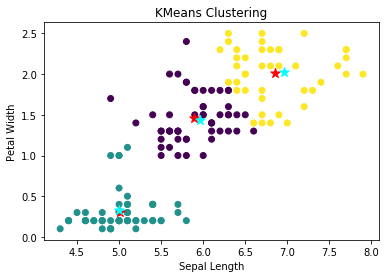

In [52]:
plt.scatter(x,y,c=kmeans_predlabels)
plt.scatter(kmeans_centers[:,0],kmeans_centers[:,1],marker='*',s=100,c='red')
plt.scatter(random_sample_centres[:,0],random_sample_centres[:,1],marker='*',s=100,c='aqua')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [53]:
print('KMeans Time :',kmeans_time)
print('KMeans++ Time :',kmeansplusplus_time)
print('Random Sampling Time :',random_sampling_time)

KMeans Time : 0.03366518020629883
KMeans++ Time : 0.026320695877075195
Random Sampling Time : 0.030256986618041992


### KDD Dataset

In [99]:
kdddata = pd.read_csv("D:/data_kddcup04/bio_train.dat",delimiter='\t',header=None)

In [100]:
kdddata_np = np.array(kdddata)
kdddata_np = kdddata_np[:,3:]

In [114]:
start_time = time.time()
kmeans.fit(kdddata_np)
kdd_kmeans_time = time.time() - start_time

In [82]:
kdd_cost_fn = kmeans.inertia_
kdd_cost_fn

In [115]:
kdd_random_data = random_sampling(kdddata_np)
start_time = time.time()
kmeans.fit(kdd_random_data)
kdd_randomsampling_time = time.time() - start_time

In [116]:
kdd_random_sample_centres = kmeans.cluster_centers_
kdd_random_score = k_means_objective(kdddata_np,kdd_random_sample_centres)/kdd_cost_fn

In [117]:
print('KDD Random Sampling Score in comparison to KMeans :',kdd_random_score)

KDD Random Sampling Score in comparison to KMeans : 0.008172621040791432


In [118]:
print('KDD KMeans Time :',kdd_kmeans_time)
print('KDD Random Sampling Time:',kdd_randomsampling_time)

KDD KMeans Time : 26.41050958633423
KDD Random Sampling Time: 19.907432556152344


### Coresets